npy檔案在 CapsNet_classification/data/quantitative_precipitation/
請將裡面的npy擋下載後 上傳到colab後依序執行cell即可

In [ ]:
import os
import scipy
import numpy as np
import tensorflow as tf


def load_mnist(batch_size, is_training=True):
    path = os.path.join('data', 'mnist')
    train_num, test_num = 60000, 10000
    if is_training:
        fd = open(os.path.join(path, 'train-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainX = loaded[16:].reshape((train_num, 28, 28, 1)).astype(np.float32)

        fd = open(os.path.join(path, 'train-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainY = loaded[8:].reshape((train_num)).astype(np.int32)

        trX = trainX[:] / 255.
        trY = trainY[:]
        num_tr_batch = train_num // batch_size

        return trX, trY, num_tr_batch
    else:
        fd = open(os.path.join(path, 't10k-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teX = loaded[16:].reshape((test_num, 28, 28, 1)).astype(np.float)

        fd = open(os.path.join(path, 't10k-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teY = loaded[8:].reshape((test_num)).astype(np.int32)

        num_te_batch = test_num // batch_size
        return teX / 255., teY, num_te_batch


def load_fashion_mnist(batch_size, is_training=True):
    path = os.path.join('data', 'fashion-mnist')
    train_num, test_num = 60000, 10000
    if is_training:
        fd = open(os.path.join(path, 'train-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainX = loaded[16:].reshape((train_num, 28, 28, 1)).astype(np.float32)

        fd = open(os.path.join(path, 'train-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainY = loaded[8:].reshape((train_num)).astype(np.int32)

        trX = trainX[:] / 255.
        trY = trainY[:]
        num_tr_batch = train_num // batch_size

        return trX, trY, num_tr_batch
    else:
        fd = open(os.path.join(path, 't10k-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teX = loaded[16:].reshape((test_num, 28, 28, 1)).astype(np.float)

        fd = open(os.path.join(path, 't10k-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teY = loaded[8:].reshape((test_num)).astype(np.int32)

        num_te_batch = test_num // batch_size
        return teX / 255., teY, num_te_batch


def load_myself(batch_size, is_training=True):
    path = os.path.join('data', 'myself')
    train_num, test_num = 719, 359
    if is_training:
        fd = open(os.path.join(path, 'train-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainX = loaded[16:].reshape((train_num, 28, 28, 1)).astype(np.float32)

        fd = open(os.path.join(path, 'train-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        trainY = loaded[8:].reshape((train_num)).astype(np.int32)

        trX = trainX[:] / 255.
        trY = trainY[:]
        num_tr_batch = train_num // batch_size

        return trX, trY, num_tr_batch
    else:
        fd = open(os.path.join(path, 'test-images-idx3-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teX = loaded[16:].reshape((test_num, 28, 28, 1)).astype(np.float)

        fd = open(os.path.join(path, 'test-labels-idx1-ubyte'))
        loaded = np.fromfile(file=fd, dtype=np.uint8)
        teY = loaded[8:].reshape((test_num)).astype(np.int32)

        num_te_batch = test_num // batch_size
        return teX / 255., teY, num_te_batch

def load_quantitative_precipitation(batch_size, is_training=True):
    target_path = os.path.join('data', 'quantitative_precipitation')
    train_num, test_num = 719, 349
    if is_training:
        fd = np.load('training_data2.npy')
        # fd = np.load('testing_images_rotated_data.npy')
        trainX = np.reshape(fd, (train_num, 28, 28, 1))

        fd = np.load('training_label2.npy')
        # fd = np.load('testing_images_rotated_label.npy')
        trainY = np.reshape(fd, (train_num))

        trX = trainX[:] / 255.
        trY = trainY[:]
        num_tr_batch = train_num // batch_size

        return trX, trY, num_tr_batch
    else:
        # fd = np.load('testing_data2.npy')
        fd = np.load('testing_images_rotated_data.npy')

        teX = np.reshape(fd, (test_num, 28, 28, 1))
        fd = np.load('testing_images_rotated_label.npy')
        # fd = np.load('testing_label2.npy')
        teY = np.reshape(fd, (test_num))

        num_te_batch = test_num // batch_size
        return teX / 255., teY, num_te_batch

def load_data(dataset, batch_size, is_training=True, one_hot=False):
    if dataset == 'mnist':
        return load_mnist(batch_size, is_training)
    elif dataset == 'fashion-mnist':
        return load_fashion_mnist(batch_size, is_training)
    elif dataset == 'myself':
        return load_myself(batch_size, is_training)
    elif dataset == 'quantitative_precipitation':
        return load_quantitative_precipitation(batch_size, is_training)
    else:
        raise Exception('Invalid dataset, please check the name of dataset:', dataset)


def get_batch_data(dataset, batch_size, num_threads):
    trX, trY, num_tr_batch = load_data(dataset, batch_size, is_training=True)
    # tf使用了兩個線程分別執行數據讀入和數據計算，創建tf的文件名域名
    data_queues = tf.train.slice_input_producer([trX, trY]) #will be removed in a future version.
    # 隨機打亂張量的順序創建batch，batch_size一次處理的tensors數量，num_thread線程數量，capacity隊列中的最大的元素數需>min_after_dequeue混合程度
    X, Y = tf.train.shuffle_batch(data_queues, num_threads=num_threads,
                                  batch_size=batch_size,
                                  capacity=batch_size * 64,
                                  min_after_dequeue=batch_size * 32,
                                  allow_smaller_final_batch=False)
    return(X, Y)


def save_images(imgs, size, path):
    '''
    Args:
        imgs: [batch_size, image_height, image_width]
        size: a list with tow int elements, [image_height, image_width]
        path: the path to save images
    '''
    imgs = (imgs + 1.) / 2  # inverse_transform
    return(scipy.misc.imsave(path, mergeImgs(imgs, size)))


def mergeImgs(images, size):
    h, w = images.shape[1], images.shape[2]
    imgs = np.zeros((h * size[0], w * size[1], 3))
    for idx, image in enumerate(images):
        i = idx % size[1]
        j = idx // size[1]
        imgs[j * h:j * h + h, i * w:i * w + w, :] = image
    return imgs


# For version compatibility
def reduce_sum(input_tensor, axis=None, keepdims=False):
    try:
        return tf.reduce_sum(input_tensor, axis=axis, keepdims=keepdims)
    except:
        return tf.reduce_sum(input_tensor, axis=axis, keep_dims=keepdims)


# For version compatibility
def softmax(logits, axis=None):
    try:
        return tf.nn.softmax(logits, axis=axis)
    except:
        return tf.nn.softmax(logits, dim=axis)


def get_shape(inputs, name=None):
    name = "shape" if name is None else name
    with tf.name_scope(name):
        static_shape = inputs.get_shape().as_list()
        dynamic_shape = tf.shape(inputs)
        shape = []
        for i, dim in enumerate(static_shape):
            dim = dim if dim is not None else dynamic_shape[i]
            shape.append(dim)
        return(shape)


In [ ]:
train_x, train_y , train_batch_num = load_quantitative_precipitation(1)
test_x, test_y , test_batch_num = load_quantitative_precipitation(1, False)

In [ ]:
train_batch_num

719

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# from keras import layers
# from keras import models
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
# model.add(layers.MaxPooling2D(2,2))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [ ]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc']
              )
# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
train_x.shape

(719, 28, 28, 1)

In [ ]:
train_history = model.fit(x=train_x, y=train_y, batch_size = 64, validation_split=0.3, epochs=50, verbose=1)
# train_history = model.fit(x=train_x, y=train_y, epochs=5, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 105ms/step - loss: 0.6621 - acc: 0.5811 - val_loss: 0.6290 - val_acc: 0.6343
Epoch 2/50
8/8 [==============================] - 1s 78ms/step - loss: 0.5941 - acc: 0.6844 - val_loss: 0.6037 - val_acc: 0.6343
Epoch 3/50
8/8 [==============================] - 1s 80ms/step - loss: 0.5844 - acc: 0.6722 - val_loss: 0.5838 - val_acc: 0.6343
Epoch 4/50
8/8 [==============================] - 1s 80ms/step - loss: 0.5763 - acc: 0.6690 - val_loss: 0.5713 - val_acc: 0.6343
Epoch 5/50
8/8 [==============================] - 1s 80ms/step - loss: 0.5405 - acc: 0.6856 - val_loss: 0.5396 - val_acc: 0.7778
Epoch 6/50
8/8 [==============================] - 1s 83ms/step - loss: 0.5279 - acc: 0.7500 - val_loss: 0.5102 - val_acc: 0.7685
Epoch 7/50
8/8 [==============================] - 1s 82ms/step - loss: 0.5007 - acc: 0.7550 - val_loss: 0.4838 - val_acc: 0.7917
Epoch 8/50
8/8 [==============================] - 1s 81ms/step - loss: 0.4817 - acc: 0.7772 - va

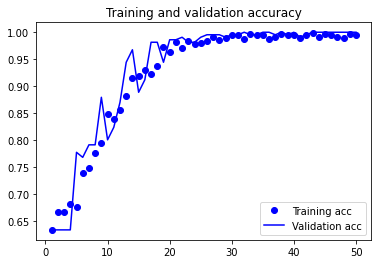

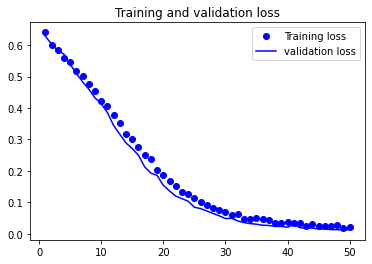

In [ ]:
import matplotlib.pyplot as plt

acc = train_history.history['acc']
val_acc = train_history.history['val_acc']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(test_x, test_y)

11/11 [==============================] - 0s 11ms/step - loss: 0.1356 - acc: 0.9542


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

# actual = [1,1,0,1,0,0,1,0,0,0]
# predicted = [1,0,0,1,0,0,1,1,1,0]
actual = test_y

y = model.predict(test_x)
y[y <= 0.5] = 0
y[y > 0.5] = 1
y = y.reshape(y.shape[0],)

predicted = y

print('testing')
tn, fp, fn,tp = confusion_matrix(actual, predicted).ravel()
print(tn, fp, fn,tp)
print('fun call')
print(accuracy_score(actual,predicted))
print(recall_score(actual,predicted))
print(precision_score(actual,predicted))
print(f1_score(actual,predicted))
print(roc_auc_score(actual,predicted))

training
472 1 1 245
fun call
0.9972183588317107
0.9959349593495935
0.9959349593495935
0.9959349593495935
0.9969103972223655
testing
230 1 15 103
fun call
0.9541547277936963
0.8728813559322034
0.9903846153846154
0.927927927927928
0.9342761758015996
